### Cardiovascular Disease Predictive Analysis using Random Forest
#### _Author: Kimaya Havle_

In this notebook we will be performing predictive analysis of risk of Cardiovascular Disease using Random Forest algorithm.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
# Reading the dataset
df = pd.read_csv('-preprocessed_dataset.csv')
df.head(5)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,30
1,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50
2,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,40
3,48,1,158,71.0,110,70,1,1,0,0,1,0,28.44,40
4,40,2,165,60.0,120,80,1,1,0,0,0,0,22.04,40


In [3]:
# Checking the shape i.e number of rows (records) and columns (features)
df.shape

(21314, 14)

### Feature selection

In [4]:
# Selecting the relevant features from the dataframe and storing it in X
X = df[['age', 'gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'height', 'weight', 'systolic', 'diastolic','pulse_pressure']]
# Selecting the target variable from the dataframe and storing it in y
y = df[['cardiovascular_disease']]

### Dataset splitting

In [5]:
# Splitting the dataset into training (75%) and test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Prediction

In [6]:
# Initializing RandomForestClassifier
rf_classifier = RandomForestClassifier()
# Training the Random Forest classifier model using the training dataset
train_model = rf_classifier.fit(X_train, y_train)

In [7]:
# Predicting for test data
y_pred = train_model.predict(X_test)

In [8]:
# Finding the accuracy score using the predicted labels and the actual test labels 
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7511728279226871

### Tuning Hyperparameters 

In [9]:
# Creating a dictionary of the hyperparameters and the range of values we want to use for tuning
# Dictionary 'key' is the name of the hyperparameter we want to tune
# Dictionary value is the range of values for the hyperparameter
# For this project we will tune the following parameters --
# 'n_estimators' - number of base estimators or weak learners we want to use
# 'max_depth' - the depth of the each decision tree in the forest
hyperparameters = {'n_estimators':[100,200,350,1000], 'max_depth': [3,5,7,9,11]}

In [10]:
# We are using GridSearchCV to tune the hyperparameters and cross validate
grid_search = GridSearchCV(estimator= rf_classifier, param_grid=hyperparameters, cv=10, scoring='accuracy')

In [11]:
grid_search_result = grid_search.fit(X, y)
grid_search_result

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 200, 350, 1000]},
             scoring='accuracy')

In [13]:
# Creating a dataframe of the GridSearchCV results
grid_search_cv_results = pd.DataFrame(grid_search_result.cv_results_)
# Displaying the relevant columns from the GridSearchCV results
grid_search_cv_results[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'max_depth': 3, 'n_estimators': 100}",0.779629
1,"{'max_depth': 3, 'n_estimators': 200}",0.779629
2,"{'max_depth': 3, 'n_estimators': 350}",0.780332
3,"{'max_depth': 3, 'n_estimators': 1000}",0.779863
4,"{'max_depth': 5, 'n_estimators': 100}",0.783804
5,"{'max_depth': 5, 'n_estimators': 200}",0.782960
6,"{'max_depth': 5, 'n_estimators': 350}",0.782302
7,"{'max_depth': 5, 'n_estimators': 1000}",0.783194
8,"{'max_depth': 7, 'n_estimators': 100}",0.786479
9,"{'max_depth': 7, 'n_estimators': 200}",0.785915


In [15]:
print("Best Accuracy:", grid_search_result.best_score_)
print("Best parameters:", grid_search_result.best_params_)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Best Accuracy: 0.7872759664137811
Best parameters: {'max_depth': 9, 'n_estimators': 1000}
Precision: 0.6672514619883041
Recall: 0.601159114857745
F1 Score: 0.6324833702882484


### Feature analysis for the model

In [16]:
# We imported the permutation_importance module from sklearn. The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(rf_classifier, X_test, y_test, n_jobs=-1)
feature_importance

{'importances_mean': array([ 3.22762244e-03, -1.31356727e-03,  2.30812535e-02,  4.12835429e-04,
         2.25182961e-04,  2.62713455e-04, -6.66133815e-17, -4.50365922e-03,
        -1.53875023e-03,  1.13867517e-01,  4.35353725e-03, -3.41527491e-03]),
 'importances_std': array([0.00159846, 0.0026029 , 0.00200709, 0.00210439, 0.00072581,
        0.00048355, 0.00131088, 0.00339231, 0.00395301, 0.00254931,
        0.00200147, 0.00208083]),
 'importances': array([[ 0.00093826,  0.00412835,  0.00487896,  0.00450366,  0.00168887],
        [-0.00431601, -0.00300244, -0.00131357,  0.00337774, -0.00131357],
        [ 0.02101708,  0.02552074,  0.02552074,  0.02158003,  0.02176769],
        [ 0.00187652, -0.00337774,  0.00225183,  0.00168887, -0.0003753 ],
        [-0.0003753 ,  0.00018765, -0.00075061,  0.00112591,  0.00093826],
        [ 0.        ,  0.00093826, -0.00018765, -0.00018765,  0.00075061],
        [ 0.00018765, -0.00131357, -0.00150122,  0.00206418,  0.00056296],
        [ 0.00075061,

In [17]:
# As seen above the 'importances_mean' key corresponds to the mean of importance of each feature
# We would like to sort the array to get the importances in an increasing order
# We can sort it using the sort() method, however we will use argsort() method which will sort the list of indices that would be present after sorting
# This argsort will be used to plot the features in an increasing order without actually sorting the data 
args = feature_importance.importances_mean.argsort()
args

array([ 7, 11,  8,  1,  6,  4,  5,  3,  0, 10,  2,  9])

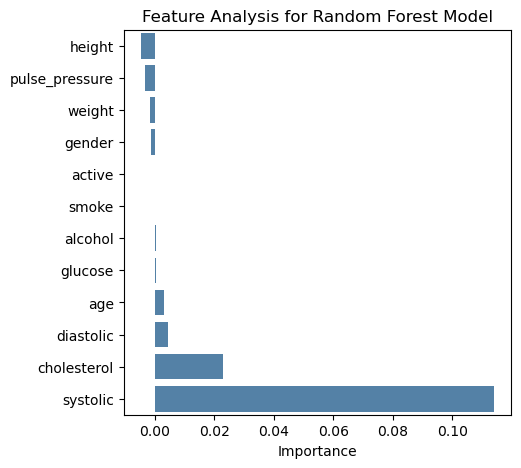

In [18]:
# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], estimator=sum, orient="h", color= "steelblue")
plt.xlabel('Importance')
plt.title('Feature Analysis for Random Forest Model')
plt.show()